In [1]:
%load_ext autoreload
%autoreload 2

In [1]:

%pylab notebook

from datacube import Datacube
import pandas as pd

# Import widgets for interactive notebook
from ipywidgets import interact, fixed
import ipywidgets as widgets

# Import the custom script for plotting. This script can be found in the dea-notebooks repository.
import sys
import os.path
sys.path.append(os.path.expanduser('/g/data/u46/users/ck9738/dea-notebooks/Algorithms/'))
import DEAPlotting

dc = Datacube(app='pixel_drill')

Populating the interactive namespace from numpy and matplotlib


Failed to resolve driver datacube.plugins.index::s3aio_index


In [2]:
query={
        'lat': (-14.74, -14.82),
        'lon': (135.35, 135.43),
        'output_crs': 'EPSG:3577',
        'resolution': (-25, 25),
        'time':('2013-01-01', '2017-12-30')
        }

In [3]:
data = dc.load(product='ls8_nbart_albers', group_by='solar_day', **query)

Failed to resolve driver datacube.plugins.io.read::s3aio
Failed to resolve driver datacube.plugins.io.read::s3aio_test


In [4]:
data

<xarray.Dataset>
Dimensions:          (time: 203, x: 357, y: 361)
Coordinates:
  * time             (time) datetime64[ns] 2013-03-30T01:00:16 ...
  * y                (y) float64 -1.568e+06 -1.568e+06 -1.568e+06 -1.568e+06 ...
  * x                (x) float64 3.639e+05 3.64e+05 3.64e+05 3.64e+05 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 3282 3236 3213 3225 3228 3219 3244 ...
    blue             (time, y, x) int16 3090 3057 3032 3019 3018 3019 3046 ...
    green            (time, y, x) int16 3197 3152 3144 3147 3125 3104 3122 ...
    red              (time, y, x) int16 3161 3096 3084 3082 3070 3055 3071 ...
    nir              (time, y, x) int16 3695 3656 3632 3629 3614 3598 3610 ...
    swir1            (time, y, x) int16 2797 2794 2802 2789 2751 2720 2714 ...
    swir2            (time, y, x) int16 2396 2367 2382 2381 2349 2321 2315 ...
Attributes:
    crs:      EPSG:3577

In [5]:
NDVI_data = (data['nir']-data['swir1'])/(data['nir']+data['swir1'])
NDVI_data

<xarray.DataArray (time: 203, y: 361, x: 357)>
array([[[ 0.138324,  0.133643, ...,  0.295019,  0.295031],
        [ 0.13731 ,  0.143712, ...,  0.291507,  0.294118],
        ...,
        [ 0.108521,  0.109954, ...,  0.146839,  0.141028],
        [ 0.10435 ,  0.10435 , ...,  0.168784,  0.158573]],

       [[ 0.62731 ,  0.522443, ...,  0.356436,  0.371287],
        [ 0.634364,  0.646113, ...,  0.346247,  0.341709],
        ...,
        [ 0.507945,  0.460078, ...,  0.262295,  0.280335],
        [ 0.51877 ,  0.507764, ...,  0.253012,  0.256   ]],

       ...,

       [[-0.008009, -0.005447, ...,  0.184762,  0.193676],
        [-0.012179, -0.008313, ...,  0.191406,  0.19057 ],
        ...,
        [ 0.382883,  0.380609, ...,  0.172881,  0.183673],
        [ 0.449427,  0.449427, ...,  0.159664,  0.167513]],

       [[ 0.002975,  0.013128, ...,  0.156939,  0.147477],
        [ 0.011017,  0.049955, ...,  0.156171,  0.156581],
        ...,
        [ 0.16369 ,  0.171165, ...,  0.071926,  0.068998

Click on the pixel you would like to interrogate


<IPython.core.display.Javascript object>


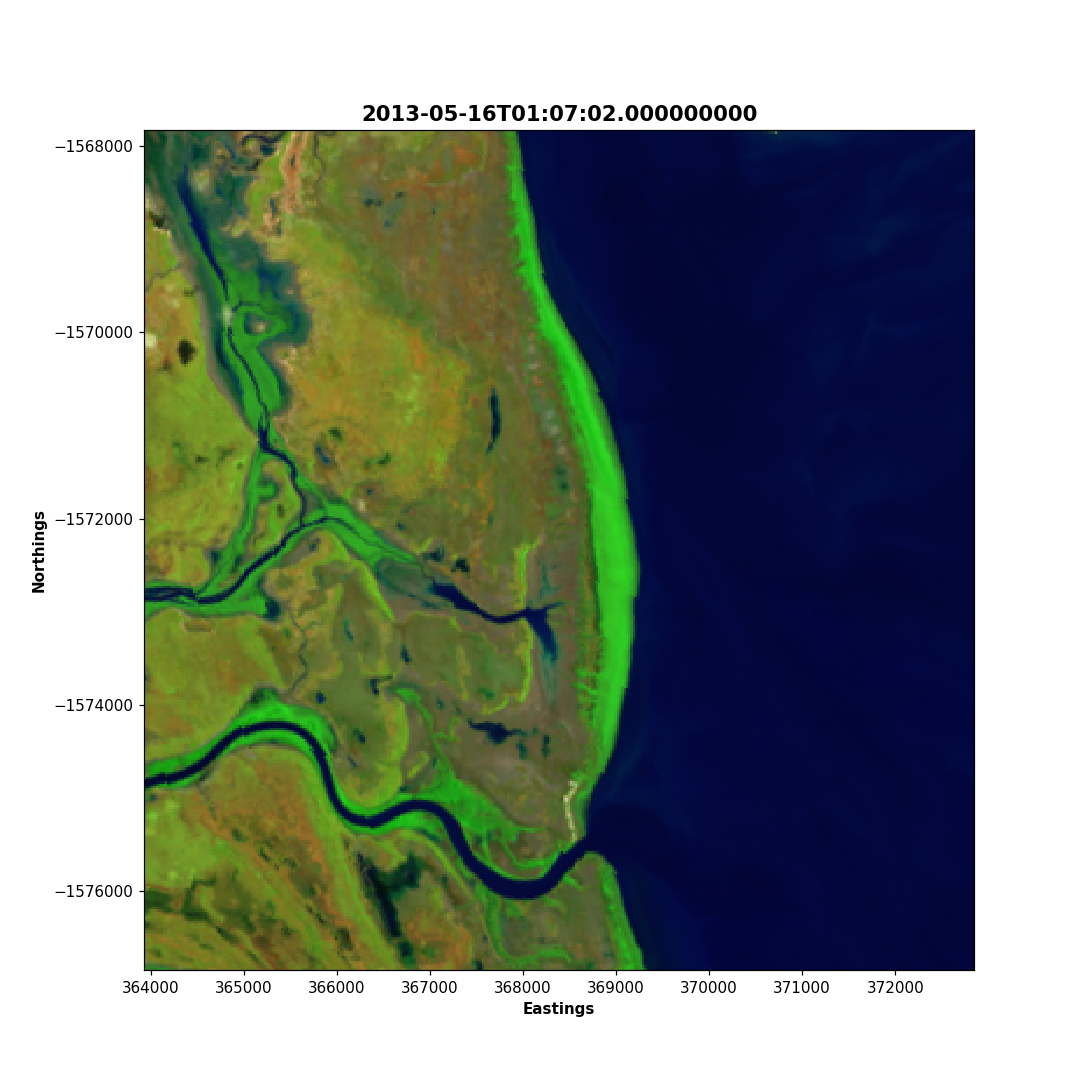

HTML(value='Click on the pixel you would like to interrogate')

In [6]:

print('\033[1m' + 'Click on the pixel you would like to interrogate' + '\033[0m')

DEAPlotting.three_band_image(data, bands=['swir1', 'nir', 'green'], time=3)

fig = plt.gcf()
w = widgets.HTML("Click on the pixel you would like to interrogate")


def onclick(event):
    global pixelx, pixely
    x, y = int(event.xdata), int(event.ydata)
    image_coords = data.affine * (x, y)
    pixelx = int(image_coords[0])
    pixely = int(image_coords[1])
    w.value = 'pixelx : {}, pixely : {}'.format(pixelx, pixely)


cid = fig.canvas.mpl_connect('button_press_event', onclick)
display(w)

<IPython.core.display.Javascript object>


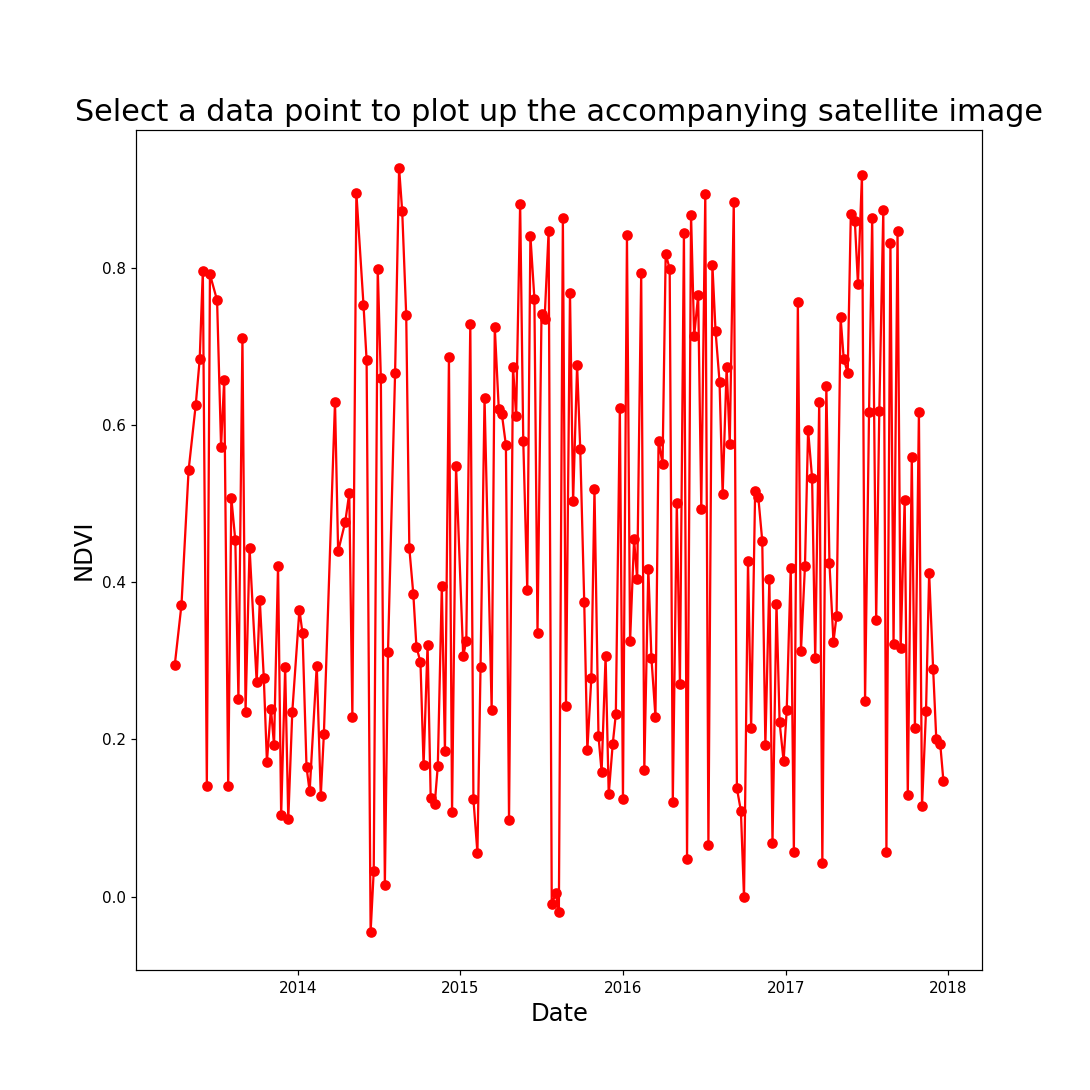

HTML(value='Click on the time you would like to display')

In [7]:
fig = plt.figure(figsize=[10, 10])

plt.plot(data.time, NDVI_data.sel(
    y=pixely, x=pixelx, method='nearest'), 'ro-')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NDVI', fontsize=16)
plt.title(
    'Select a data point to plot up the accompanying satellite image', fontsize=20)

w = widgets.HTML("Click on the time you would like to display")


def onclick(event):
    global timeOfInterest
    timeOfInterest = event.xdata
    w.value = 'time of interest : {}'.format(timeOfInterest)


cid = fig.canvas.mpl_connect('button_press_event', onclick)
display(w)

In [20]:

# Convert clicked int to datetime format
time_slice = matplotlib.dates.num2date(timeOfInterest).date()
# Convert clicked value to str
time_slice = str(time_slice)
# Convert clicked value to correct datetime format
time_slice = pd.to_datetime(time_slice, format='%Y-%m-%d')
time_slice

Timestamp('2016-01-10 00:00:00')

<IPython.core.display.Javascript object>


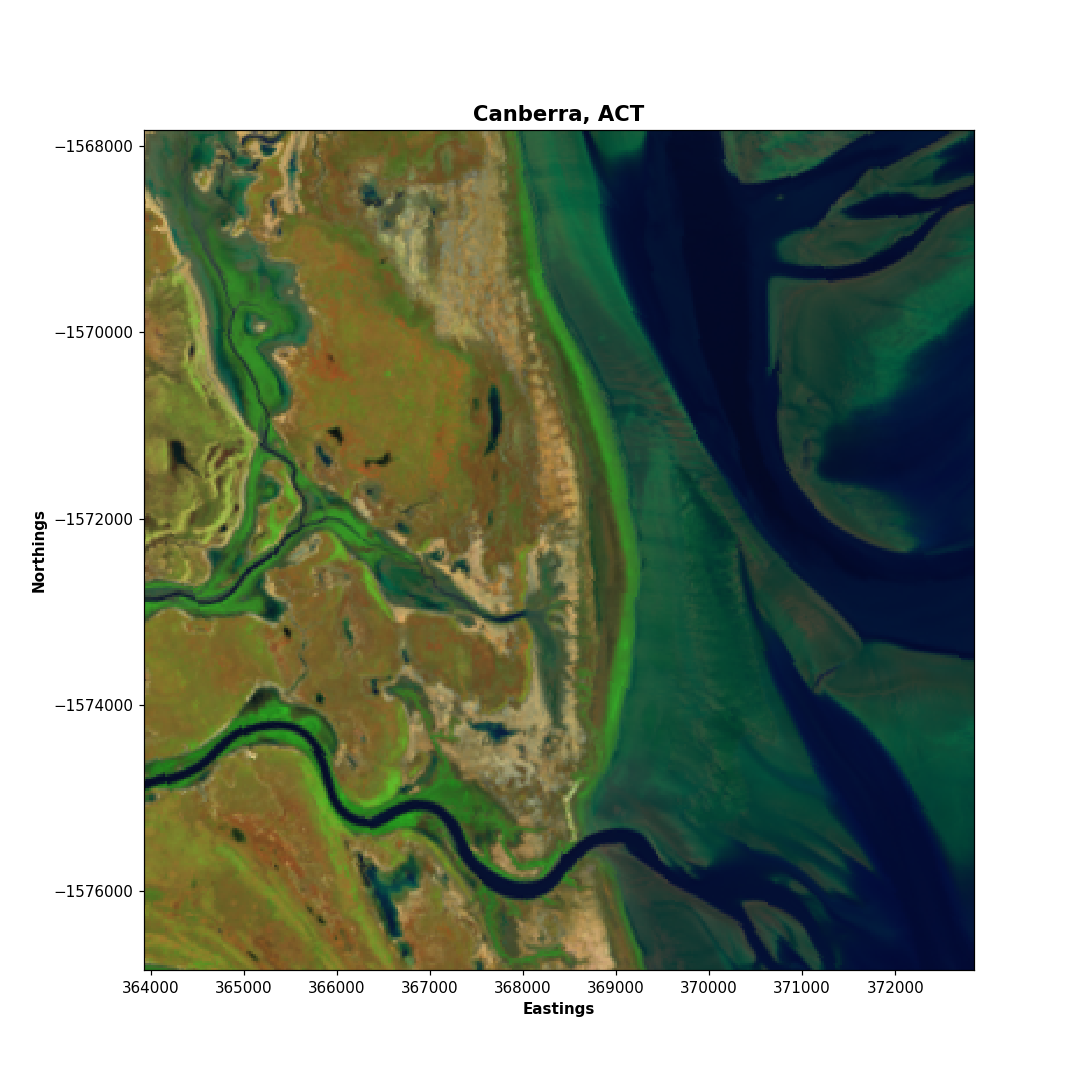

In [21]:

DEAPlotting.three_band_image(data.sel(time=time_slice, method='nearest'), bands=['swir1', 'nir', 'green'],
                             title='Canberra, ACT');